In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rasterio
import cv2
from PIL import Image
from matplotlib.colors import ListedColormap

In [91]:
band_paths = []

for i in range(1, 12):
    path = f"/mnt/Data/Optical/Landsat_8/LC09_L1TP_165039_20250730_20250801_02_T1/LC09_L1TP_165039_20250730_20250801_02_T1_B{i}.TIF"
    band_paths.append(path)

print(band_paths)

['/mnt/Data/Optical/Landsat_8/LC09_L1TP_165039_20250730_20250801_02_T1/LC09_L1TP_165039_20250730_20250801_02_T1_B1.TIF', '/mnt/Data/Optical/Landsat_8/LC09_L1TP_165039_20250730_20250801_02_T1/LC09_L1TP_165039_20250730_20250801_02_T1_B2.TIF', '/mnt/Data/Optical/Landsat_8/LC09_L1TP_165039_20250730_20250801_02_T1/LC09_L1TP_165039_20250730_20250801_02_T1_B3.TIF', '/mnt/Data/Optical/Landsat_8/LC09_L1TP_165039_20250730_20250801_02_T1/LC09_L1TP_165039_20250730_20250801_02_T1_B4.TIF', '/mnt/Data/Optical/Landsat_8/LC09_L1TP_165039_20250730_20250801_02_T1/LC09_L1TP_165039_20250730_20250801_02_T1_B5.TIF', '/mnt/Data/Optical/Landsat_8/LC09_L1TP_165039_20250730_20250801_02_T1/LC09_L1TP_165039_20250730_20250801_02_T1_B6.TIF', '/mnt/Data/Optical/Landsat_8/LC09_L1TP_165039_20250730_20250801_02_T1/LC09_L1TP_165039_20250730_20250801_02_T1_B7.TIF', '/mnt/Data/Optical/Landsat_8/LC09_L1TP_165039_20250730_20250801_02_T1/LC09_L1TP_165039_20250730_20250801_02_T1_B8.TIF', '/mnt/Data/Optical/Landsat_8/LC09_L1TP_

In [92]:
band_paths

['/mnt/Data/Optical/Landsat_8/LC09_L1TP_165039_20250730_20250801_02_T1/LC09_L1TP_165039_20250730_20250801_02_T1_B1.TIF',
 '/mnt/Data/Optical/Landsat_8/LC09_L1TP_165039_20250730_20250801_02_T1/LC09_L1TP_165039_20250730_20250801_02_T1_B2.TIF',
 '/mnt/Data/Optical/Landsat_8/LC09_L1TP_165039_20250730_20250801_02_T1/LC09_L1TP_165039_20250730_20250801_02_T1_B3.TIF',
 '/mnt/Data/Optical/Landsat_8/LC09_L1TP_165039_20250730_20250801_02_T1/LC09_L1TP_165039_20250730_20250801_02_T1_B4.TIF',
 '/mnt/Data/Optical/Landsat_8/LC09_L1TP_165039_20250730_20250801_02_T1/LC09_L1TP_165039_20250730_20250801_02_T1_B5.TIF',
 '/mnt/Data/Optical/Landsat_8/LC09_L1TP_165039_20250730_20250801_02_T1/LC09_L1TP_165039_20250730_20250801_02_T1_B6.TIF',
 '/mnt/Data/Optical/Landsat_8/LC09_L1TP_165039_20250730_20250801_02_T1/LC09_L1TP_165039_20250730_20250801_02_T1_B7.TIF',
 '/mnt/Data/Optical/Landsat_8/LC09_L1TP_165039_20250730_20250801_02_T1/LC09_L1TP_165039_20250730_20250801_02_T1_B8.TIF',
 '/mnt/Data/Optical/Landsat_8/LC

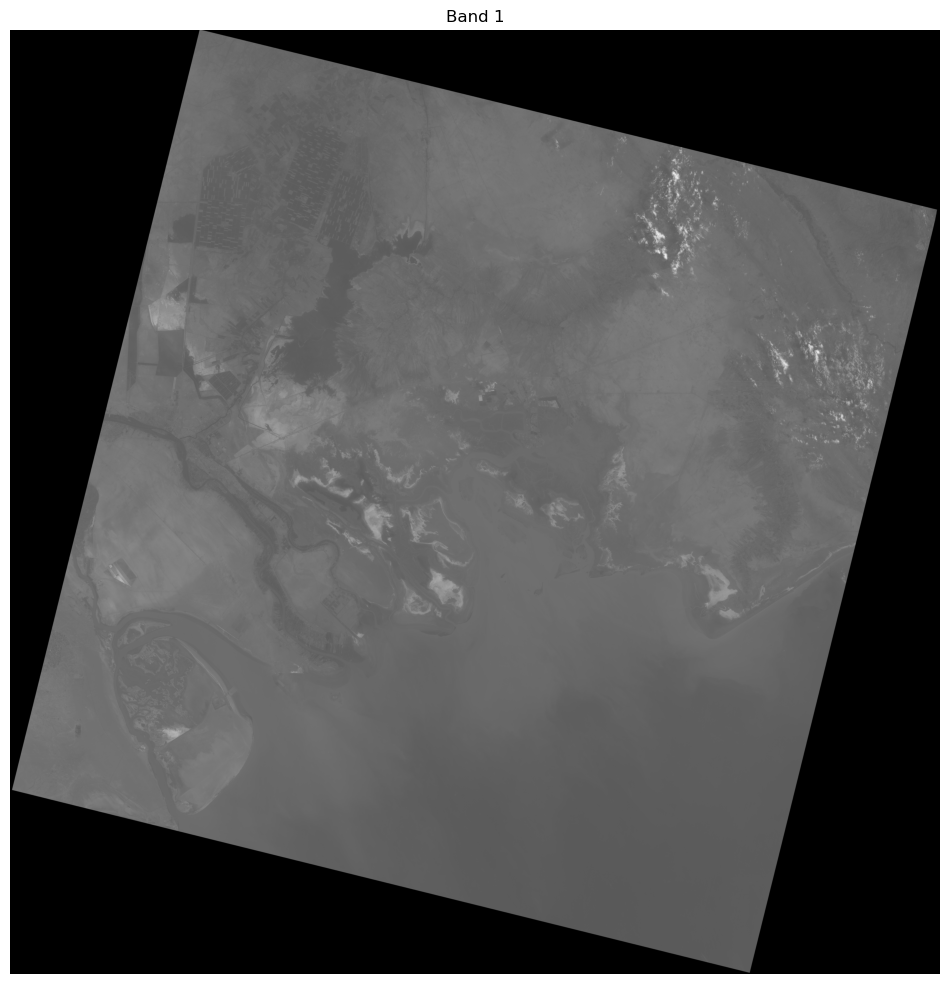

In [93]:
band = []
for i in range(1, 12):
    with rasterio.open(band_paths[i-1]) as src:
        b = src.read(1)
        band.append(b)

plt.figure(figsize=(12, 20))
plt.imshow(band[0], cmap='gray')
plt.title(f"Band 1")
plt.axis('off')
plt.show()

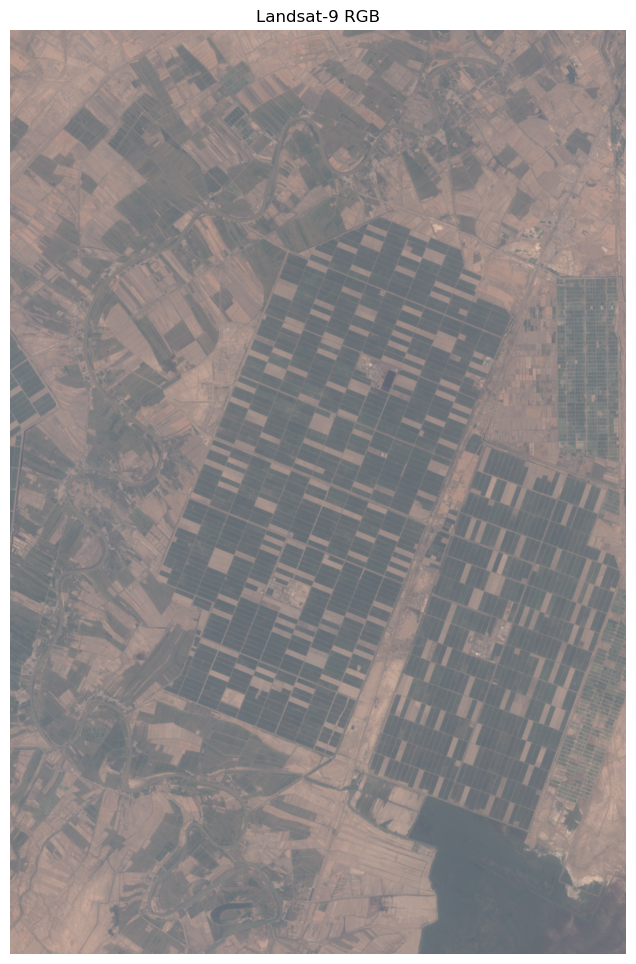

In [ ]:
blue = band[1]
green = band[2]
red = band[3]
rgb_img = np.dstack((red, green, blue)).astype(np.float32)
rgb_img_cropped = rgb_img[500:2000, 2000:3000]

rgb_img_cropped = rgb_img_cropped / rgb_img_cropped.max()

plt.figure(figsize=(12, 12))
plt.imshow(rgb_img_cropped)
plt.title("Landsat-9 RGB")
plt.axis("off")
#plt.savefig("Water_RGB.png", dpi=200, bbox_inches="tight")
plt.show()

/tmp/ipykernel_4568/3108894089.py:10: RuntimeWarning: divide by zero encountered in divide
  NDWI = NDWI_1 / NDWI_2
/tmp/ipykernel_4568/3108894089.py:10: RuntimeWarning: invalid value encountered in divide
  NDWI = NDWI_1 / NDWI_2


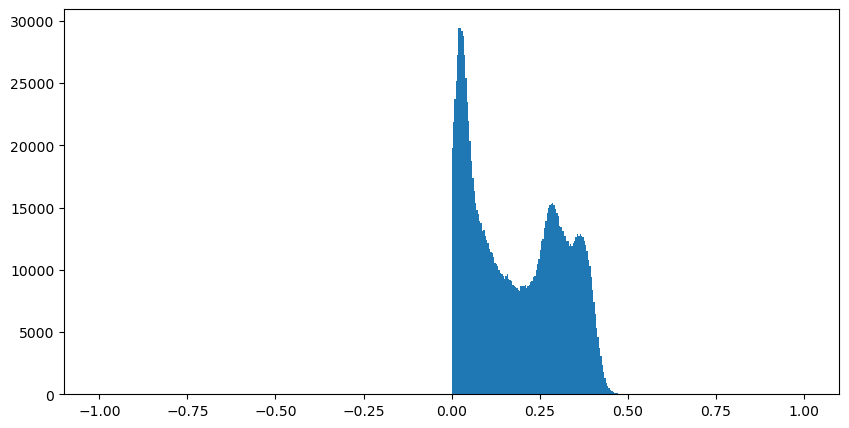

In [111]:
Blue = band[1]
Red  = band[3]
NIR  = band[4]
SWIR_1 = band[5]
SWIR_2 = band[6]
SWIR = (SWIR_1+SWIR_2)/2

NDWI_1 = (NIR - SWIR_2)
NDWI_2 = (NIR + SWIR_2)
NDWI = NDWI_1 / NDWI_2

NDWI_cropped = NDWI[500:2000, 2000:3000]
plt.figure(figsize=[10,5])
plt.hist(NDWI_cropped.flatten(), bins=256*2, range= [-1,1])
plt.show()

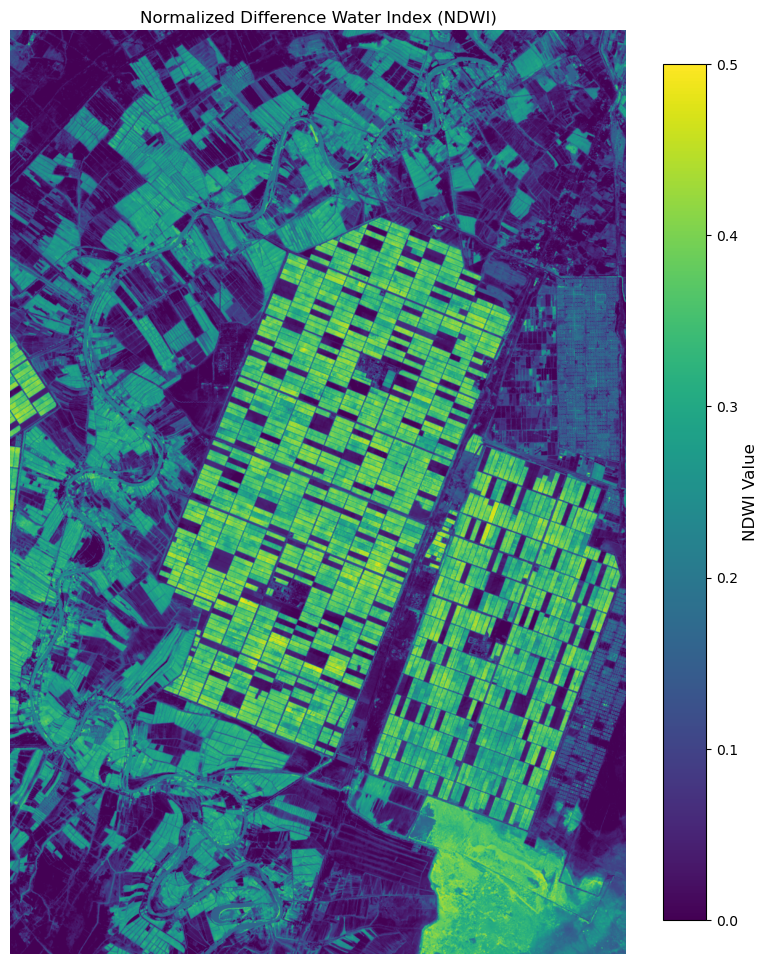

In [ ]:
NDWI_done = np.where((NDWI_cropped > 0.5), 0, NDWI_cropped)
plt.figure(figsize=(12, 12))
im = plt.imshow(NDWI_done, vmin=0.0, vmax=0.5, cmap="viridis")
plt.title("Normalized Difference Water Index (NDWI)")
plt.axis("off")

cbar = plt.colorbar(im, fraction=0.046, pad=0.04)
cbar.set_label("NDWI Value", fontsize=12)
#plt.savefig("water.png", dpi=200, bbox_inches="tight")
plt.show()